This notebook explored Smart Lights from March 2021 to March 2022.

# Explore API data

In [1]:
%cd ../../
%load_ext autoreload
%autoreload 2

e:\Mare5\Documents\Šola\IŠRM\ds-smart-lights


In [2]:
from src.api import *
from src.v0 import config, data_utils

import json
import pandas as pd
import matplotlib.pyplot as plt

## Download sensor data

Run first time only

In [ ]:
# %run "api.py"

## Load data

### ARSO data

```
MARIBOR - VRBANSKI PLATO
lon=15.6260
lat=46.5678
nmv=279m
```

Download raw [ARSO](http://meteo.arso.gov.si/) data.

Download merged csv [here](https://drive.google.com/file/d/19VSZLDY_HY2HNar-eeL4YYKFqxYG2bP-/view?usp=sharing).

#### Merge csv files

For first time

In [ ]:
data_utils._merge_arso_csv_data()

#### Load merged csv

In [3]:
gt = data_utils.load_arso_data(preprocess=False)
gt.head()

,station,date,tempc,relhumperc
0,MARIBOR - VRBANSKI PLATO,2021-01-01 00:00:00,-0.2,92
1,MARIBOR - VRBANSKI PLATO,2021-01-01 00:10:00,-0.4,92
2,MARIBOR - VRBANSKI PLATO,2021-01-01 00:20:00,-0.6,93
3,MARIBOR - VRBANSKI PLATO,2021-01-01 00:30:00,-0.7,93
4,MARIBOR - VRBANSKI PLATO,2021-01-01 00:40:00,-1.1,93


### Sensor data

In [4]:
masters = ["134225002", "134225010", "134225019"]

In [7]:
df = read_entries(f'data/v0/{masters[0]}.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19878 entries, 0 to 19877
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   radarpedholdtime           19375 non-null  float64       
 1   partpolu100gm3             19633 non-null  float64       
 2   radarpedminspdlastperiod   19375 non-null  float64       
 3   maxpowerprocentage         19375 non-null  float64       
 4   radarvechnumdetect         19375 non-null  float64       
 5   radarvechavgspdlastperiod  19375 non-null  float64       
 6   typpartsize                19633 non-null  float64       
 7   currentina                 0 non-null      float64       
 8   rawstatus                  19633 non-null  float64       
 9   lumintreshold              19375 non-null  float64       
 10  radarpednumdetlastperiod   19375 non-null  float64       
 11  partpolu010gm3             19633 non-null  float64       
 12  rada

In [10]:
df.head()

,radarpedholdtime,partpolu100gm3,radarpedminspdlastperiod,maxpowerprocentage,radarvechnumdetect,radarvechavgspdlastperiod,typpartsize,currentina,rawstatus,lumintreshold,...,radarpedimmulevel,radarvechimmulevel,radarpedmaxspeed,radarvechavgspeed,relhumperc,radarpedmaxspdlastperiod,luminlux,minpowerprocentage,gpslongitude,partpolu025gm3
0,3.0,18.722601,1.0,100.0,56.0,5.0,0.630783,NaN,0.0,90.0,...,4.0,3.0,19.0,11.0,50.0,22.0,83853.0,35.0,NaN,18.234276
1,3.0,17.438160,1.0,100.0,61.0,5.0,0.567413,NaN,0.0,90.0,...,4.0,3.0,19.0,10.0,50.0,22.0,39381.0,35.0,NaN,17.148237
2,3.0,18.644304,1.0,100.0,71.0,5.0,0.631577,NaN,0.0,90.0,...,4.0,3.0,19.0,10.0,49.0,22.0,62028.0,35.0,NaN,18.127579
3,3.0,16.071825,1.0,100.0,1.0,9.0,0.635818,NaN,0.0,90.0,...,4.0,3.0,0.0,6.0,50.0,19.0,60840.0,35.0,NaN,15.626024
4,3.0,13.718788,1.0,100.0,6.0,9.0,0.614410,NaN,0.0,90.0,...,4.0,3.0,9.0,4.0,51.0,19.0,46680.0,35.0,NaN,13.402535


In [11]:
df.tail()

,radarpedholdtime,partpolu100gm3,radarpedminspdlastperiod,maxpowerprocentage,radarvechnumdetect,radarvechavgspdlastperiod,typpartsize,currentina,rawstatus,lumintreshold,...,radarpedimmulevel,radarvechimmulevel,radarpedmaxspeed,radarvechavgspeed,relhumperc,radarpedmaxspdlastperiod,luminlux,minpowerprocentage,gpslongitude,partpolu025gm3
19873,3.0,6.569811,0.0,100.0,2.0,6.0,0.574585,NaN,0.0,90.0,...,4.0,3.0,0.0,4.0,56.0,0.0,15068.0,35.0,NaN,6.460583
19874,3.0,7.434565,0.0,100.0,4.0,6.0,0.597626,NaN,0.0,90.0,...,4.0,3.0,0.0,5.0,55.0,0.0,14577.0,35.0,NaN,7.307004
19875,3.0,6.199630,0.0,100.0,6.0,6.0,0.560928,NaN,0.0,90.0,...,4.0,3.0,0.0,7.0,54.0,0.0,18403.0,35.0,NaN,6.096556
19876,3.0,6.362824,0.0,100.0,10.0,6.0,0.569931,NaN,0.0,90.0,...,4.0,3.0,0.0,8.0,54.0,0.0,20992.0,35.0,NaN,6.257038
19877,3.0,6.409102,0.0,100.0,14.0,6.0,0.607605,NaN,0.0,90.0,...,4.0,3.0,20.0,6.0,54.0,0.0,24731.0,35.0,NaN,6.248731


## Explore data

In [5]:
DFs = [read_entries(f'data/v0/{serial}.csv') for serial in masters]

In [6]:
START_DATE = DFs[0]['inserted_at'].min()
END_DATE = DFs[0]['inserted_at'].max()
START_DATE, END_DATE

(Timestamp('2021-03-09 08:38:20'), Timestamp('2022-03-01 08:02:15'))

### tempc

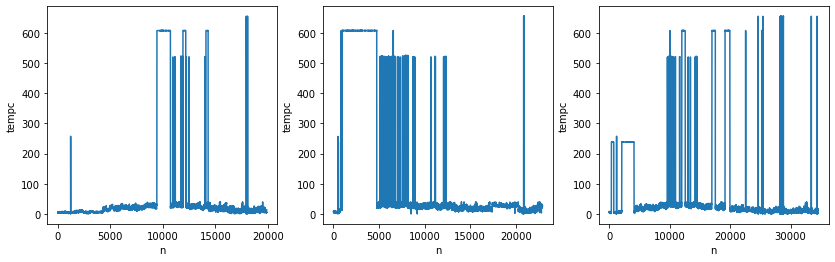

In [7]:
fig, axs = plt.subplots(1, len(DFs), figsize=(14, 4))
for df, ax in zip(DFs, axs.flat):
    df['tempc'].plot(ax=ax, xlabel='n', ylabel='tempc')

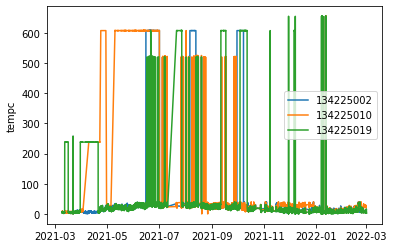

In [15]:
for serial, df in zip(masters, DFs):
    plt.plot(df.set_index(['inserted_at'])['tempc'], label=serial)
# plt.plot(pd.concat(DFs, ignore_index=True).set_index(['inserted_at'])['tempc'].sort_index().rolling('1d').median(), label='merged')
plt.ylabel('tempc')
plt.legend()

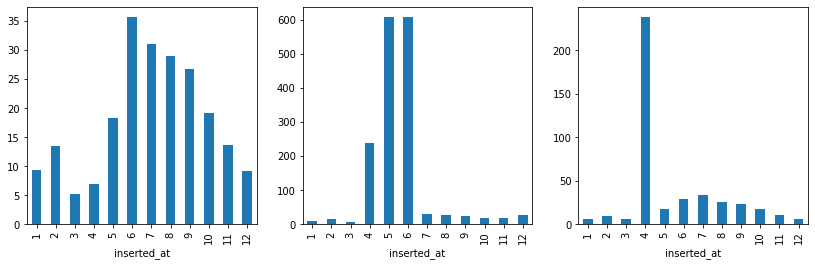

In [16]:
fig, axs = plt.subplots(1, len(DFs), figsize=(14, 4))
for df, ax in zip(DFs, axs.flat):
    df.groupby(df['inserted_at'].dt.month)["tempc"].median().plot.bar(ax=ax)

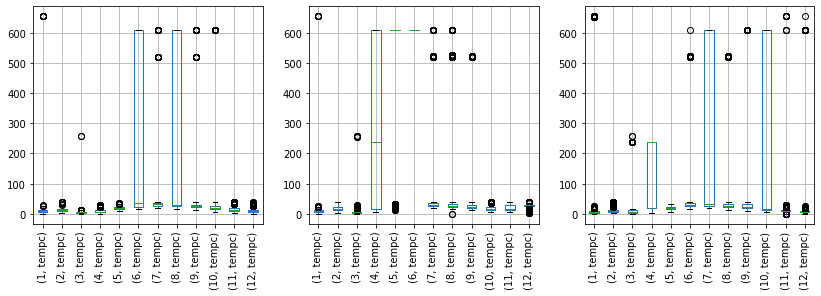

In [17]:
fig, axs = plt.subplots(1, len(DFs), figsize=(14, 4))
for df, ax in zip(DFs, axs.flat):
    df.groupby(df['inserted_at'].dt.month).boxplot(column='tempc', subplots=False, rot=90, ax=ax)

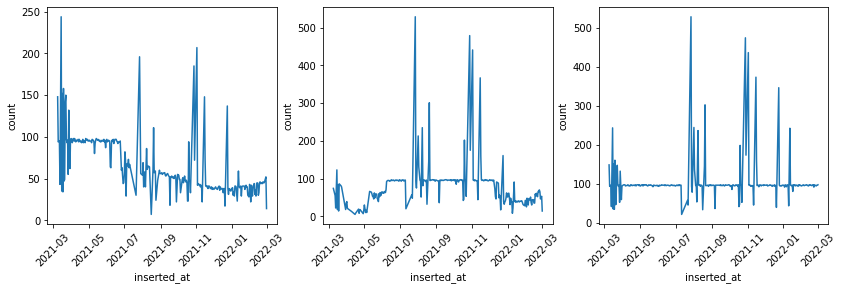

In [18]:
fig, axs = plt.subplots(1, len(DFs), figsize=(14, 4))
for df, ax in zip(DFs, axs.flat):
    df.groupby(df['inserted_at'].dt.date)['tempc'].count().plot(ax=ax, ylabel='count', rot=45)

In [19]:
# Irregular sampling rate ...
DFs[0].groupby([DFs[0]['inserted_at'].dt.date, DFs[0]['inserted_at'].dt.hour])['tempc'].count()

inserted_at  inserted_at
2021-03-09   8              13
             9              37
             10             33
             11             17
             12              4
                            ..
2022-02-28   16              3
2022-03-01   5               2
             6               7
             7               4
             8               1
Name: tempc, Length: 4454, dtype: int64

### Ground truth tempc

<AxesSubplot:xlabel='date'>

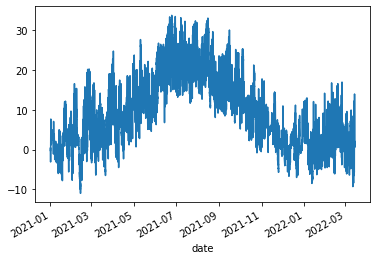

In [20]:
gt.set_index(['date'])['tempc'].plot()

<AxesSubplot:xlabel='date'>

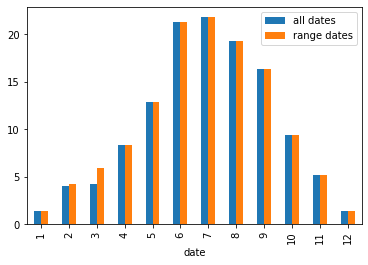

In [8]:
pd.DataFrame({
    'all dates': gt.groupby(gt['date'].dt.month)["tempc"].mean(),
    'range dates': gt.loc[(gt['date'] >= START_DATE) & (gt['date'] <= END_DATE)].groupby(gt['date'].dt.month)["tempc"].mean(),
}).plot.bar()

### Fix tempc

N.B. 
- Removing outliers (> 100 °C) and merging temperatures across all devices gives results closer to the ground truth data.
- Sensor data is closer to the groundtruth during summer months than during winter.


Removed: 1806
Removed: 4189
Removed: 4604


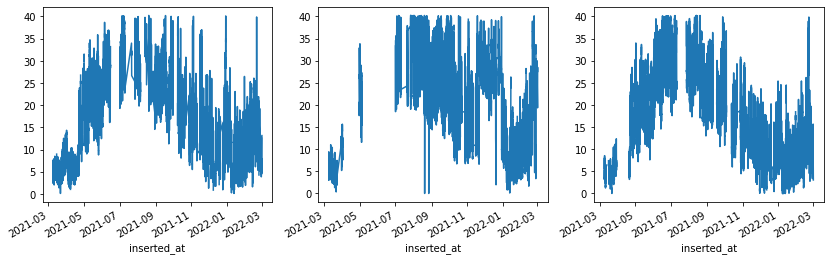

In [22]:
fig, axs = plt.subplots(1, len(DFs), figsize=(14, 4))
for df, ax in zip(DFs, axs.flat):
    # df['tempc'].plot(ax=ax, xlabel='n', ylabel='tempc')
    print("Removed:", len(df[df['tempc'] > 100]['tempc']))
    df = df.drop(df[df['tempc'] > 100].index)
    df.set_index(['inserted_at'])['tempc'].plot(ax=ax)

<AxesSubplot:title={'center':'Merged tempc monthly'}, xlabel='month', ylabel='tempc'>

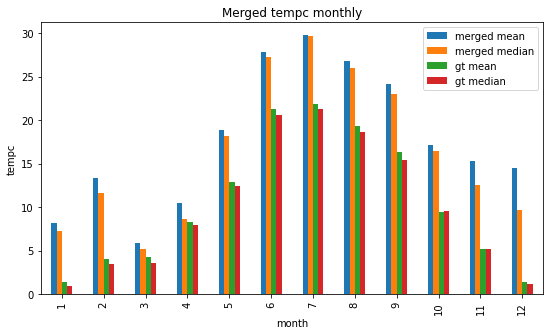

In [9]:
DFs_corrected = [df.drop(df[df['tempc'] > 100].index) for df in DFs]
df = pd.concat(DFs_corrected, ignore_index=True)

pd.DataFrame({
    'merged mean': df.groupby(df['inserted_at'].dt.month)["tempc"].mean(),
    'merged median': df.groupby(df['inserted_at'].dt.month)["tempc"].median(),
    'gt mean': gt.groupby(gt['date'].dt.month)["tempc"].mean(),
    'gt median': gt.groupby(gt['date'].dt.month)["tempc"].median(),
}).plot.bar(xlabel='month', ylabel='tempc', figsize=(9, 5), title='Merged tempc monthly')

<AxesSubplot:title={'center':'1 day moving average temperature'}, ylabel='tempc'>

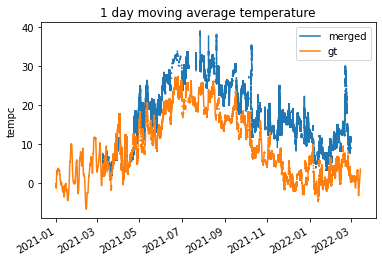

In [24]:
pd.DataFrame({
    'merged': pd.concat(DFs_corrected, ignore_index=True).set_index(['inserted_at'])['tempc'].sort_index().rolling('1d').mean(),
    'gt': gt.set_index('date')['tempc'].sort_index().rolling('1d').mean(),
}).plot(ylabel='tempc', title='1 day moving average temperature')

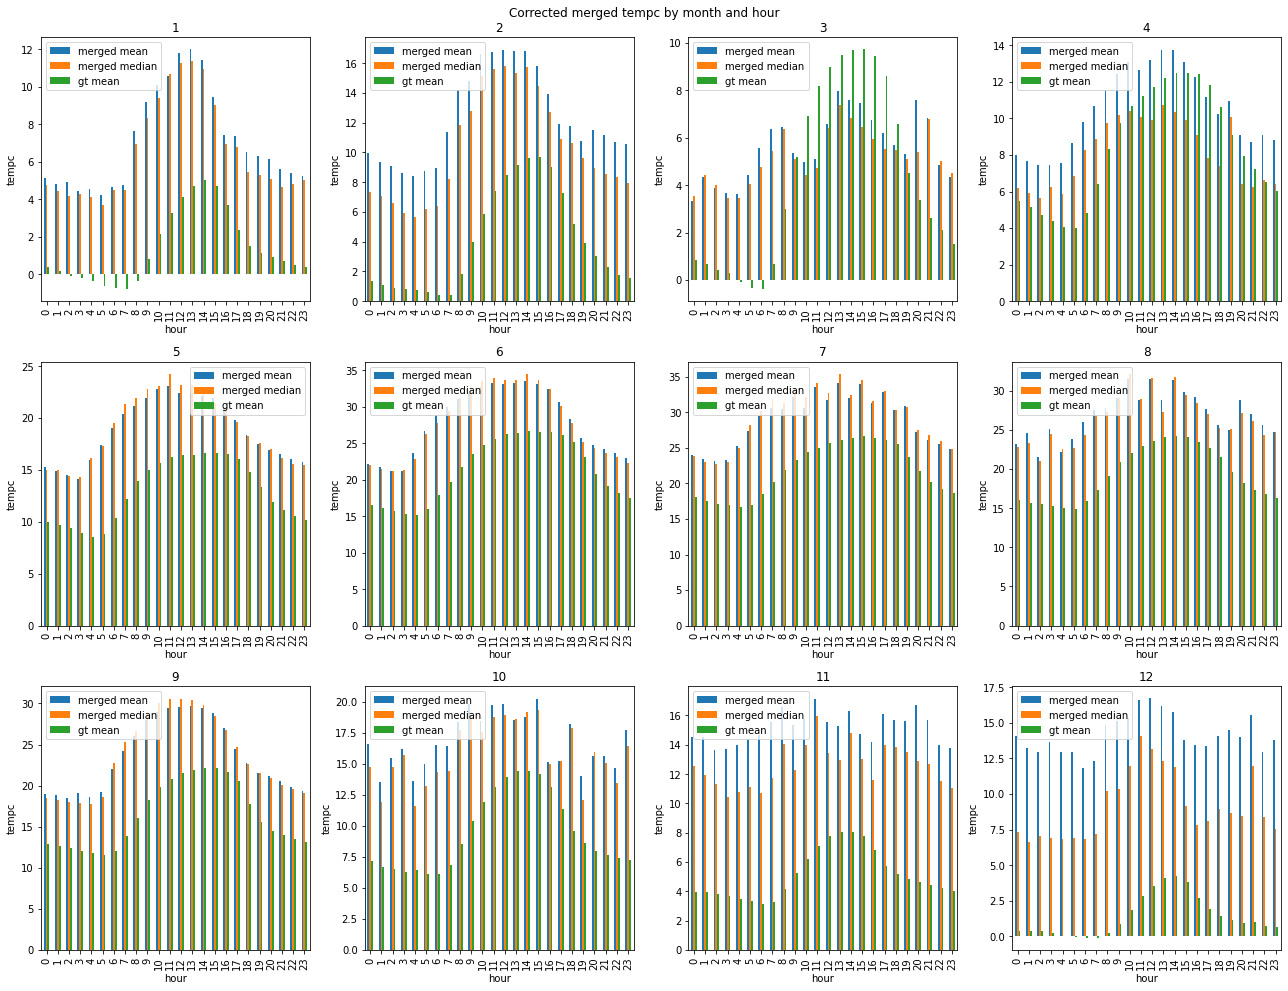

In [25]:
fig, axs = plt.subplots(3, 4, figsize=(18, 14))
base_df = pd.concat(DFs_corrected, ignore_index=True) # DFs_corrected[0]
for (month, df), (_, gf) in zip(base_df.groupby(base_df['inserted_at'].dt.month), gt.groupby(gt['date'].dt.month)):
    pd.DataFrame({
        'merged mean': df.groupby(df['inserted_at'].dt.hour)['tempc'].mean(),
        'merged median': df.groupby(df['inserted_at'].dt.hour)['tempc'].median(),
        'gt mean': gf.groupby(gf['date'].dt.hour)['tempc'].mean(),
    }).plot.bar(ax=axs.flatten()[month-1], ylabel='tempc', xlabel='hour', title=str(month))
fig.suptitle('Corrected merged tempc by month and hour')
fig.tight_layout()

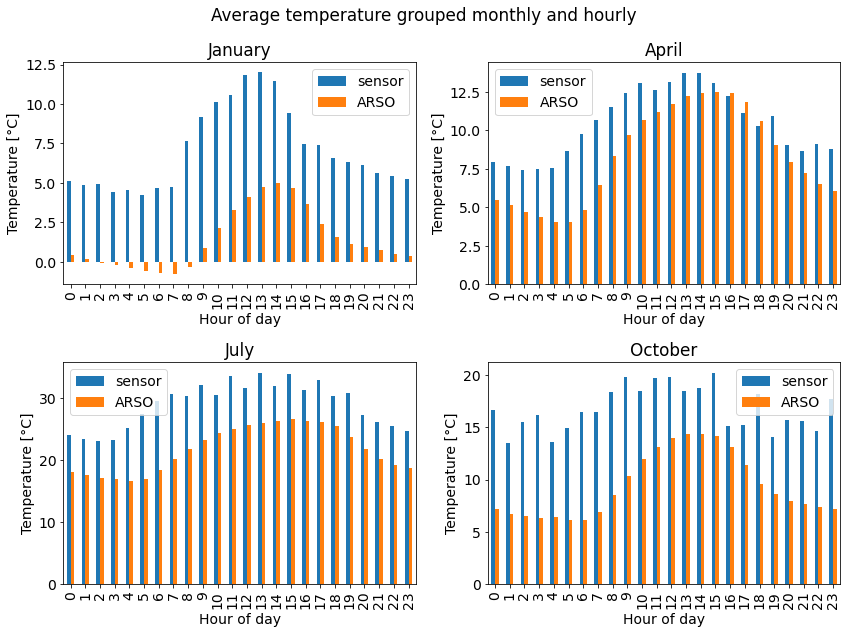

In [20]:
# For report...
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(2, 2, figsize=(4*3,3*3))
base_df = pd.concat(DFs_corrected, ignore_index=True)
month_map = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
i = 0
for (month, df), (_, gf) in zip(base_df.groupby(base_df['inserted_at'].dt.month), gt.groupby(gt['date'].dt.month)):
    if month not in [1,4,7,10]:
        continue 
    pd.DataFrame({
        'sensor': df.groupby(df['inserted_at'].dt.hour)['tempc'].mean(),
        #'sensor median': df.groupby(df['inserted_at'].dt.hour)['tempc'].median(),
        'ARSO': gf.groupby(gf['date'].dt.hour)['tempc'].mean(),
    }).plot.bar(ax=axs.flatten()[i], ylabel='Temperature [°C]', xlabel='Hour of day', title=month_map[month-1])
    i += 1
fig.suptitle('Average temperature grouped monthly and hourly')
fig.tight_layout()
fig.savefig('./interim_report/fig/tempc.pdf', bbox_inches='tight')

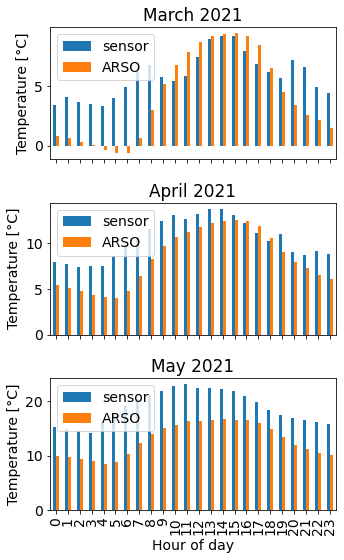

In [31]:
# For report...
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(3, 1, figsize=(5, 8), squeeze=False, sharex=True)
base_df = pd.concat(DFs_corrected, ignore_index=True)
month_map = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
i = 0
for (month, df), (_, gf) in zip(base_df.groupby(base_df['inserted_at'].dt.month), gt.groupby(gt['date'].dt.month)):
    if month not in [3,4,5]:
        continue 
    pd.DataFrame({
        'sensor': df.groupby(df['inserted_at'].dt.hour)['tempc'].mean(),
        #'sensor median': df.groupby(df['inserted_at'].dt.hour)['tempc'].median(),
        'ARSO': gf.groupby(gf['date'].dt.hour)['tempc'].mean(),
    }).plot.bar(ax=axs.flatten()[i], ylabel='Temperature [°C]', xlabel='Hour of day', title=month_map[month-1] + " 2021")
    i += 1
# fig.suptitle('Average temperature grouped monthly and hourly')
fig.tight_layout()
fig.savefig('./figs/old_tempc_hour_month.pdf', bbox_inches='tight')

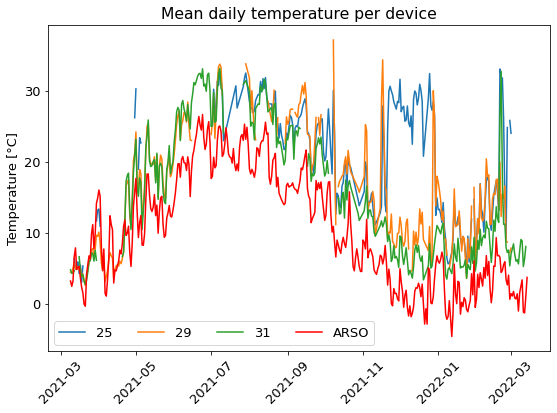

In [71]:
X = data_utils.load_api_data(include_device_src=True)
gt = data_utils.load_arso_data()
gt = gt[gt['date'] > X.index.min()]
plt.rcParams.update({'font.size': 13})
tmp = {}
fig, ax = plt.subplots(figsize=(9,6))
for id_ in [25,29,31]:
    d = X.loc[X['device_id'] == id_]
    tmp[id_] = d['tempc'].groupby(d['inserted_at'].dt.date).mean()
ax = pd.DataFrame(tmp).plot(ax=ax, rot=45, title="Mean daily temperature per device")
ax.plot(gt['tempc'].groupby(gt['date'].dt.date).mean(), color='red', label='ARSO')
ax.set_ylabel('Temperature [°C]')
ax.legend(ncol=4)
ax.get_xaxis().get_label().set_visible(False)
fig.savefig("./figs/old_tempc_mean_daily.pdf", bbox_inches="tight")

### relhumperc

N.B.
- Relative humidity percent is closer to the ground-truth compared to temperature

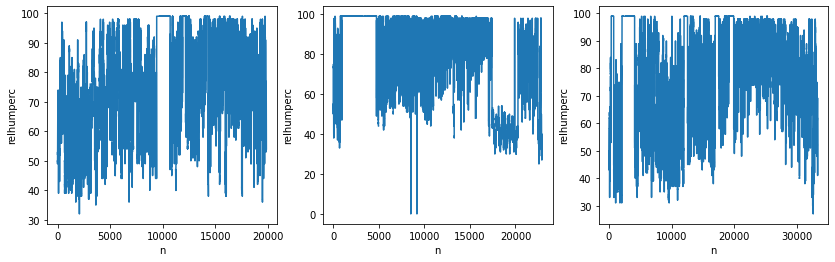

In [26]:
fig, axs = plt.subplots(1, len(DFs), figsize=(14, 4))
for df, ax in zip(DFs, axs.flat):
    df['relhumperc'].plot(ax=ax, xlabel='n', ylabel='relhumperc')

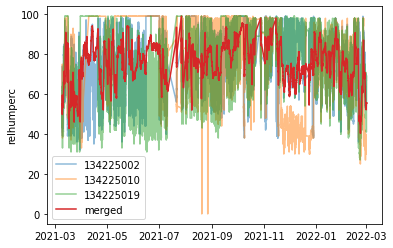

In [27]:
for serial, df in zip(masters, DFs):
    plt.plot(df.set_index(['inserted_at'])['relhumperc'], label=serial, alpha=0.5)
plt.plot(pd.concat(DFs, ignore_index=True).set_index(['inserted_at'])['relhumperc'].sort_index().rolling('1d').mean(), label='merged')
plt.ylabel('relhumperc')
plt.legend()

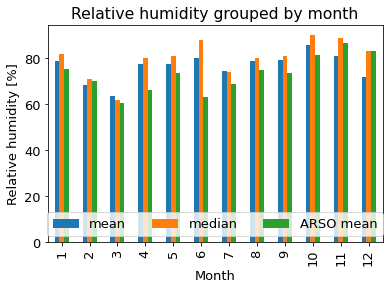

In [29]:
plt.rcParams.update({'font.size': 13})
df = pd.concat(DFs, ignore_index=True)
pd.DataFrame({
    'mean': df.groupby(df['inserted_at'].dt.month)['relhumperc'].mean(),
    'median': df.groupby(df['inserted_at'].dt.month)['relhumperc'].median(),
    'ARSO mean': gt.groupby(gt['date'].dt.month)['relhumperc'].mean(),
}).plot.bar(title='Relative humidity grouped by month', xlabel='Month', ylabel='Relative humidity [%]').legend(loc='lower center', ncol=3)
plt.savefig('./interim_report/fig/relhumperc.pdf', bbox_inches='tight')

<AxesSubplot:title={'center':'1 day moving average relhumperc'}, ylabel='relhumperc'>

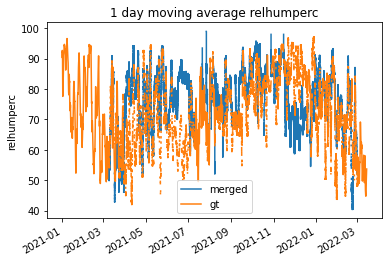

In [29]:
pd.DataFrame({
    'merged': pd.concat(DFs, ignore_index=True).set_index(['inserted_at'])['relhumperc'].sort_index().rolling('1d').mean(),
    'gt': gt.set_index('date')['relhumperc'].sort_index().rolling('1d').mean(),
}).plot(ylabel='relhumperc', title='1 day moving average relhumperc')

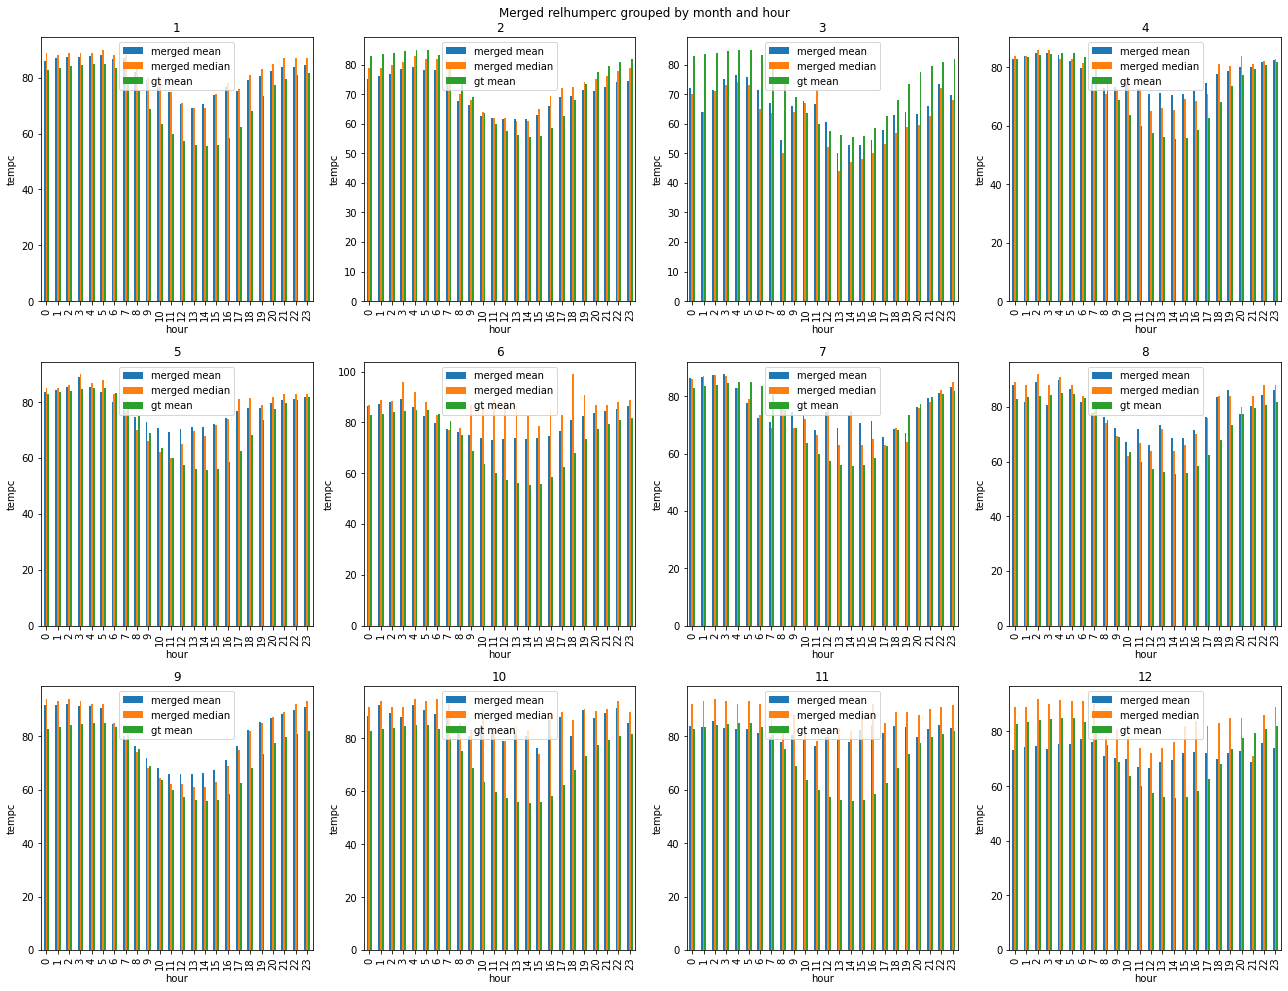

In [30]:
fig, axs = plt.subplots(3, 4, figsize=(18, 14))
base_df = pd.concat(DFs, ignore_index=True) # DFs_corrected[0]
for (month, df), (_, gf) in zip(base_df.groupby(base_df['inserted_at'].dt.month), gt.groupby(gt['date'].dt.month)):
    pd.DataFrame({
        'merged mean': df.groupby(df['inserted_at'].dt.hour)['relhumperc'].mean(),
        'merged median': df.groupby(df['inserted_at'].dt.hour)['relhumperc'].median(),
        'gt mean': gt.groupby(gt['date'].dt.hour)['relhumperc'].mean(),
    }).plot.bar(ax=axs.flatten()[month-1], ylabel='tempc', xlabel='hour', title=str(month))
fig.suptitle('Merged relhumperc grouped by month and hour')
fig.tight_layout()

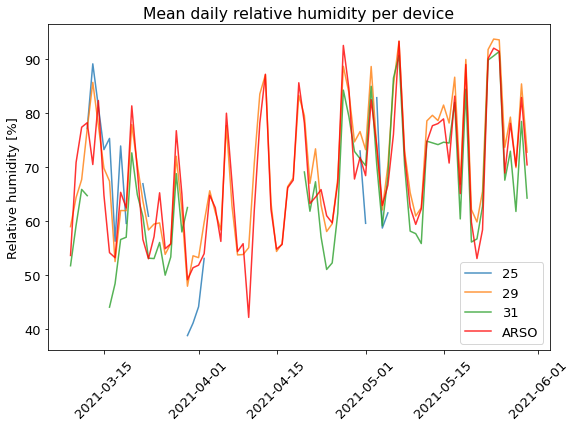

In [70]:
X = data_utils.load_api_data(include_device_src=True)
X = X[(X.index > pd.Timestamp(2021,3,1)) & (X.index < pd.Timestamp(2021,5,31))]
gt = data_utils.load_arso_data()
gt = gt[(gt['date'] >= X.index.min()) & (gt['date'] <= X.index.max())]
plt.rcParams.update({'font.size': 13})
tmp = {}
fig, ax = plt.subplots(figsize=(9,6))
for id_ in [25,29,31]:
    d = X.loc[X['device_id'] == id_]
    tmp[id_] = d['relhumperc'].groupby(d['inserted_at'].dt.date).mean()
ax = pd.DataFrame(tmp).plot(ax=ax, rot=45, title="Mean daily relative humidity per device", alpha=0.8)
ax.plot(gt['relhumperc'].groupby(gt['date'].dt.date).mean(), color='red', label='ARSO', alpha=0.8)
ax.set_ylabel('Relative humidity [%]')
ax.legend()
ax.get_xaxis().get_label().set_visible(False)
fig.savefig("./figs/old_relhumperc_mean_daily.pdf", bbox_inches="tight")

### pressmbar

IMPORTANT: ARSO station `Maribor - Vrbanski plato` doesn't contain pressure measurements!

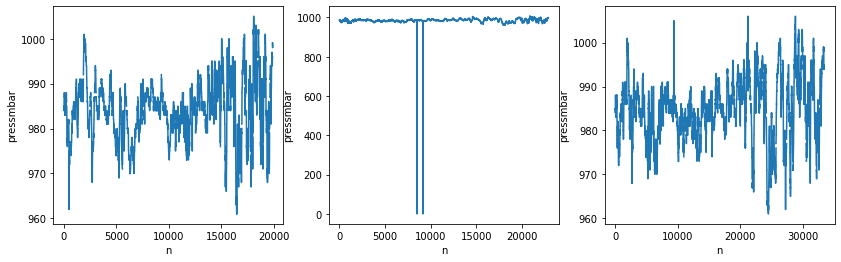

In [31]:
fig, axs = plt.subplots(1, len(DFs), figsize=(14, 4))
for df, ax in zip(DFs, axs.flat):
    df['pressmbar'].plot(ax=ax, xlabel='n', ylabel='pressmbar')

<AxesSubplot:title={'center':'merged pressmbar mean'}, xlabel='inserted_at', ylabel='mbar'>

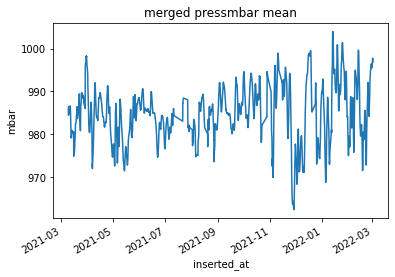

In [32]:
pd.concat(DFs, ignore_index=True).set_index(['inserted_at'])['pressmbar'].sort_index().rolling('1d').mean().plot(title='merged pressmbar mean', ylabel='mbar')

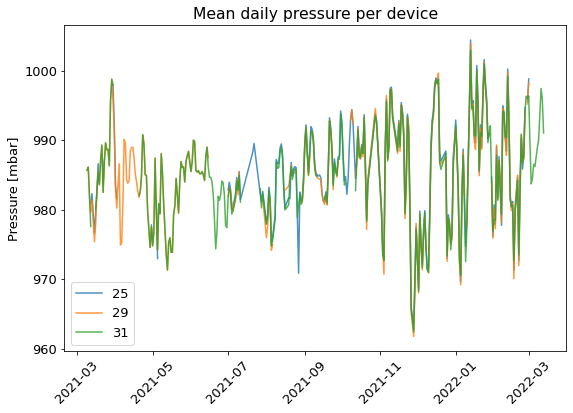

In [10]:
X = data_utils.load_api_data(include_device_src=True)
# X = X[(X.index > pd.Timestamp(2021,3,1)) & (X.index < pd.Timestamp(2021,5,31))]
gt = data_utils.load_arso_data()
gt = gt[(gt['date'] >= X.index.min()) & (gt['date'] <= X.index.max())]
plt.rcParams.update({'font.size': 13})
tmp = {}
fig, ax = plt.subplots(figsize=(9,6))
for id_ in [25,29,31]:
    d = X.loc[X['device_id'] == id_]
    tmp[id_] = d['pressmbar'].groupby(d['inserted_at'].dt.date).mean()
ax = pd.DataFrame(tmp).plot(ax=ax, rot=45, title="Mean daily pressure per device", alpha=0.8)
# ax.plot(gt['pressmbar'].groupby(gt['date'].dt.date).mean(), color='red', label='ARSO', alpha=0.8)
ax.set_ylabel('Pressure [mbar]')
ax.legend()
ax.get_xaxis().get_label().set_visible(False)
fig.savefig("./figs/old_pressmbar_mean_daily.pdf", bbox_inches="tight")

## API tests

In [41]:
api = WiseAliceAPI(credentials_path='secrets.txt')

In [43]:
api.get_first_entry_date('02fb4284-05b6-4210-9fb8-d481c3bc2f85')

'2021-03-08'

In [44]:
api.get_last_entry_date('02fb4284-05b6-4210-9fb8-d481c3bc2f85')

'2022-03-01'

In [ ]:
api.get_entries('02fb4284-05b6-4210-9fb8-d481c3bc2f85', '2022-03-01')

In [ ]:
api.get_devices()

In [47]:
api.get_entry_types()

[{'code': 'ACTIVATIONPARAM',
  'description': 'Activation parameters',
  'id': 59,
  'unit': 'NU'},
 {'code': 'ACTIVATIONSTATUS',
  'description': 'Activation status of parameters',
  'id': 22,
  'unit': 'NU'},
 {'code': 'ACTIVEPACKETNUM',
  'description': 'Active number of packets',
  'id': 63,
  'unit': 'NU'},
 {'code': 'CO2PPM', 'description': 'CO2 in ppm', 'id': 5, 'unit': 'ppm'},
 {'code': 'CO2PPMLIMIT',
  'description': 'CO2 PPM limit',
  'id': 60,
  'unit': 'ppm'},
 {'code': 'CURRENTINA', 'description': 'Current in A', 'id': 18, 'unit': 'A'},
 {'code': 'CURRENTINMA',
  'description': 'Current in mA',
  'id': 19,
  'unit': 'mA'},
 {'code': 'FIRMWAREVERSION',
  'description': 'Firmware version',
  'id': 61,
  'unit': 'NU'},
 {'code': 'GPSLATITUDE',
  'description': 'GPS latitude',
  'id': 23,
  'unit': 'NU'},
 {'code': 'GPSLONGITUDE',
  'description': 'GPS longitude',
  'id': 24,
  'unit': 'NU'},
 {'code': 'LUMINLUX',
  'description': 'Luminosity in lux',
  'id': 4,
  'unit': 'lux